#Preguntas:
###1-¿Cuál es la distribución de las puntuaciones Del Mini Examen Del Estado Mental (MMSE) en el conjunto de datos?
###2- ¿Qué relación hay entre la edad y el diagnóstico de alzhéimer?
###3- ¿Cuál es la proporción de pacientes con el genotipo APOE4?
###4- ¿Qué relación hay entre el genotipo APOE y el diagnóstico de alzhéimer?
###5- ¿Cuál es la evolución del Nivel Cognitivo (MMSE) según el Diagnóstico (DX)?
###6- ¿Cómo se distribuyen los pacientes según su subtipo de diagnóstico?


In [52]:
#Base de datos original
url_datos_original = "https://raw.githubusercontent.com/ianCristianAriel/2023-sistemapredictivo-Alzheimer/main/datos/procesados/data_EDA.csv"

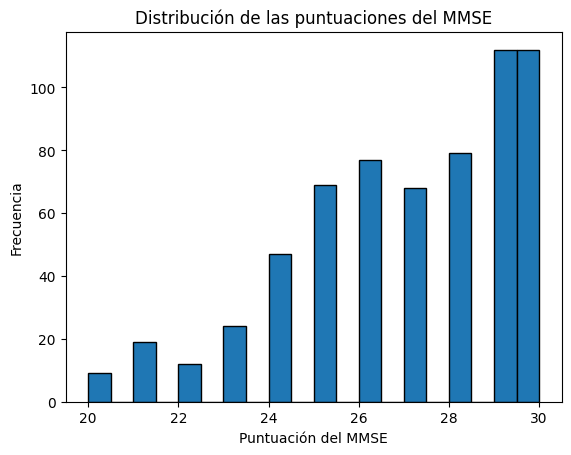

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el conjunto de datos desde la URL
df = pd.read_csv(url_datos_original)

# Calcular la distribución de las puntuaciones del MMSE
mmse_scores = df['MMSE']

# Crear un histograma para visualizar la distribución
plt.hist(mmse_scores, bins=20, edgecolor='k')
plt.xlabel('Puntuación del MMSE')
plt.ylabel('Frecuencia')
plt.title('Distribución de las puntuaciones del MMSE')
plt.show()

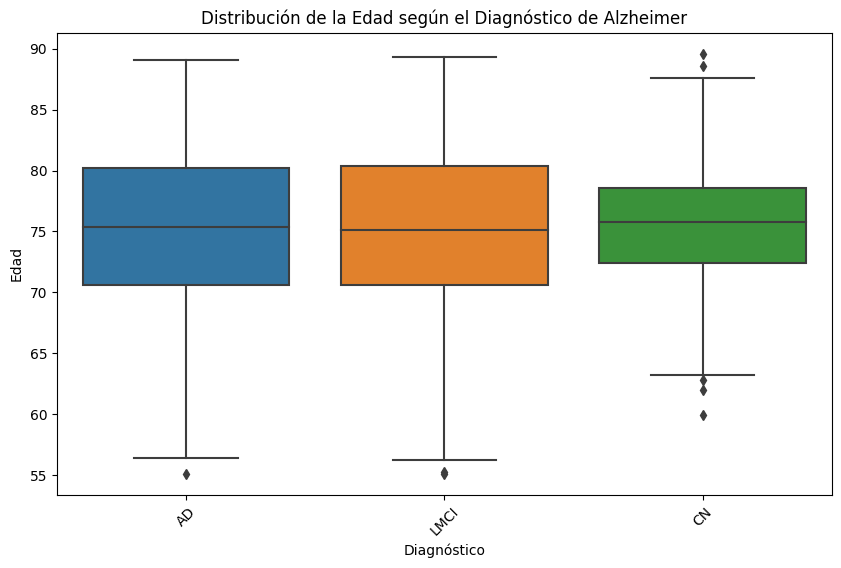

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar la base de datos
data = pd.read_csv(url_datos_original)

# Crear un gráfico de caja para comparar la edad según el diagnóstico
plt.figure(figsize=(10, 6))
sns.boxplot(x='DX', y='AGE', data=data)
plt.title('Distribución de la Edad según el Diagnóstico de Alzheimer')
plt.xlabel('Diagnóstico')
plt.ylabel('Edad')
plt.xticks(rotation=45)
plt.show()

Proporción de pacientes con genotipo APOE4: 0.37261146496815284


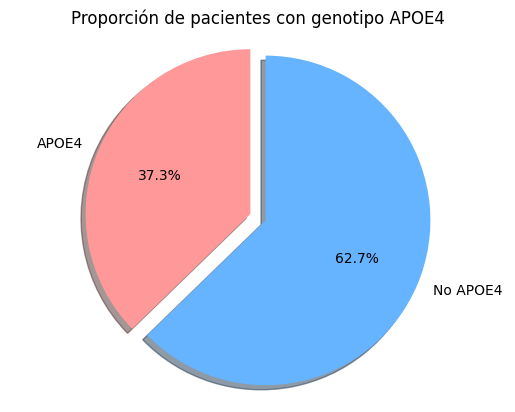

In [34]:
import pandas as pd

# Cargar los datos
df = pd.read_csv(url_datos_original)

# Calcular la proporción de pacientes con el genotipo APOE4
apoE4_count = df[df['APOE4'] == 1]['APOE4'].count()
total_count = df['APOE4'].count()
proporcion_apoE4 = apoE4_count / total_count

print("Proporción de pacientes con genotipo APOE4:", proporcion_apoE4)

import matplotlib.pyplot as plt

# Crear un gráfico de torta para visualizar la proporción
labels = 'APOE4', 'No APOE4'
sizes = [proporcion_apoE4, 1 - proporcion_apoE4]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # Resaltar la primera porción (APOE4)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Para que el gráfico sea un círculo.

plt.title('Proporción de pacientes con genotipo APOE4')
plt.show()

<Figure size 1000x600 with 0 Axes>

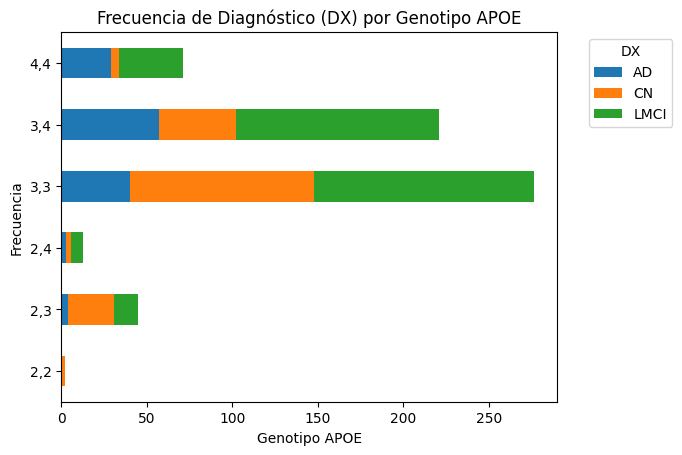

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv(url_datos_original)

# Crear un gráfico de barras o de mosaico
plt.figure(figsize=(10, 6))

# Contar las frecuencias de DX por genotipo APOE
frequencies = df.groupby('APOE Genotype')['DX'].value_counts().unstack().fillna(0)

# Crear el gráfico de barras horizontales
frequencies.plot(kind='barh', stacked=True)
plt.xlabel('Genotipo APOE')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Diagnóstico (DX) por Genotipo APOE')
plt.legend(title='DX', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

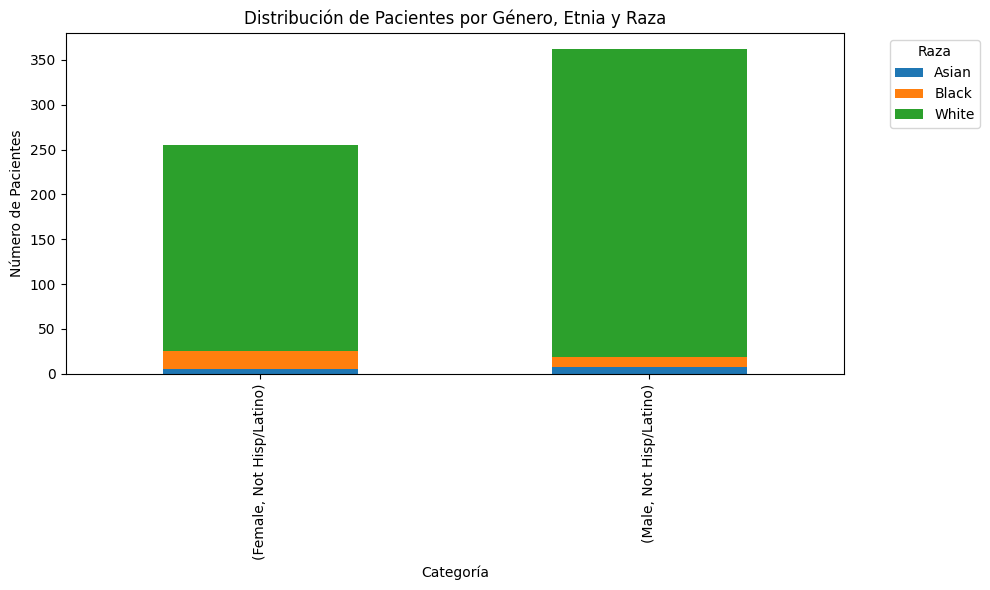

In [36]:

import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
data = pd.read_csv(url_datos_original)

# Filtrar barras que tengan más de 10 pacientes
data_filtrada = data[data['PTGENDER'].notna() & data['PTETHCAT'].notna() & data['PTRACCAT'].notna()]
data_filtrada = data_filtrada.groupby(['PTGENDER', 'PTETHCAT', 'PTRACCAT']).size().unstack().fillna(0)
data_filtrada = data_filtrada[data_filtrada.sum(axis=1) > 10]

# Crear el gráfico de barras apiladas
data_filtrada.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribución de Pacientes por Género, Etnia y Raza')
plt.xlabel('Categoría')
plt.ylabel('Número de Pacientes')
plt.legend(title='Raza', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

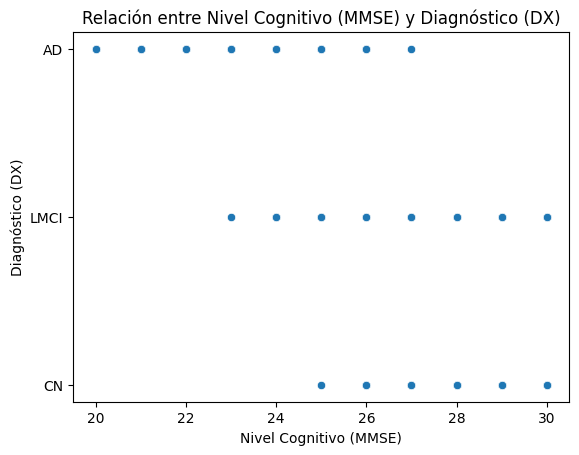

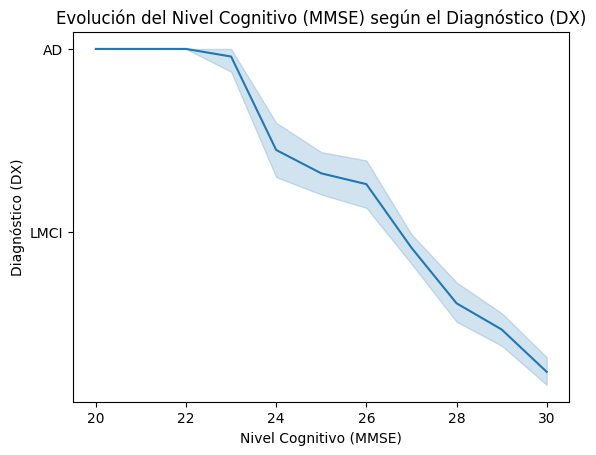

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
datos = pd.read_csv(url_datos_original)

# Crear un gráfico de dispersión
sns.scatterplot(data=datos, x='MMSE', y='DX')
plt.title('Relación entre Nivel Cognitivo (MMSE) y Diagnóstico (DX)')
plt.xlabel('Nivel Cognitivo (MMSE)')
plt.ylabel('Diagnóstico (DX)')
plt.show()

# Crear un gráfico de línea para mostrar la evolución del MMSE según el diagnóstico
sns.lineplot(data=datos, x='MMSE', y='DX')
plt.title('Evolución del Nivel Cognitivo (MMSE) según el Diagnóstico (DX)')
plt.xlabel('Nivel Cognitivo (MMSE)')
plt.ylabel('Diagnóstico (DX)')
plt.show()

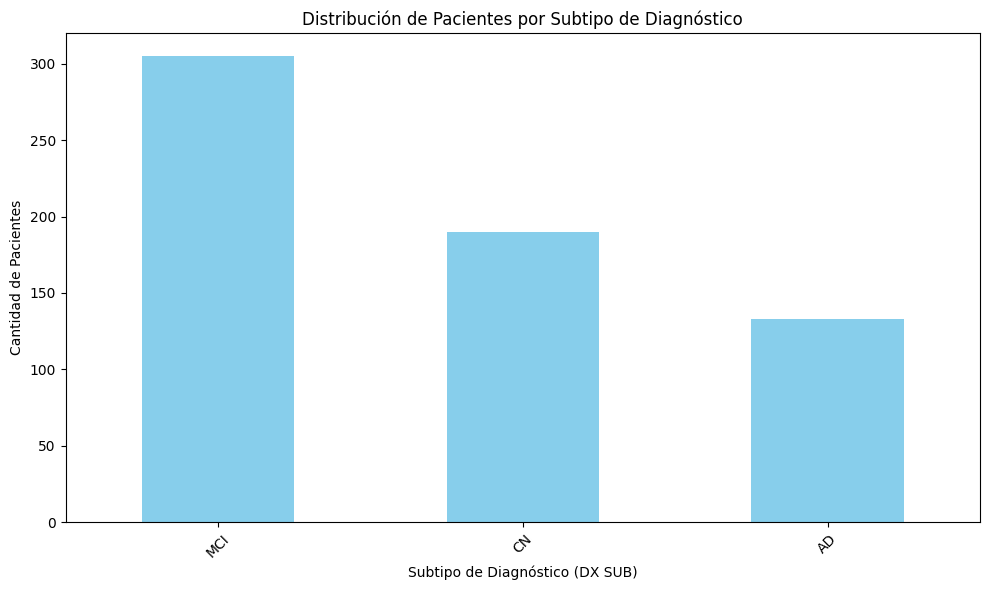

In [38]:

import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv(url_datos_original)

# Contar la cantidad de pacientes por subtipo de diagnóstico (DX SUB)
diagnosis_counts = df['DX_SUB'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
diagnosis_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Pacientes por Subtipo de Diagnóstico')
plt.xlabel('Subtipo de Diagnóstico (DX SUB)')
plt.ylabel('Cantidad de Pacientes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***¿Cual es la proporcion de los diagnosticados con respecto a la enfermdad?***

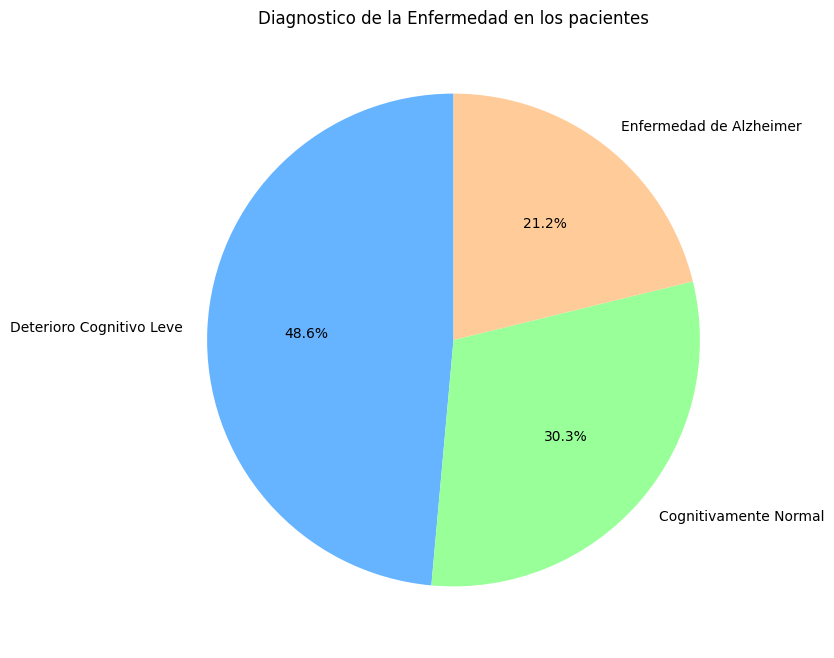

In [39]:
import matplotlib.pyplot as plt
import pandas as pd


proporciones_dx = df['DX'].value_counts(normalize=True)
# Definir etiquetas más descriptivas
etiquetas = {'AD': 'Enfermedad de Alzheimer', 'LMCI': 'Deterioro Cognitivo Leve', 'CN': 'Cognitivamente Normal'}
proporciones_dx = proporciones_dx.rename(index=etiquetas)
# Configurar el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(proporciones_dx, labels=proporciones_dx.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])

# Agregar título
plt.title('Diagnostico de la Enfermedad en los pacientes')

# Mostrar el gráfico
plt.show()


***¿Tendrá relacion la enfermedad con los años de estudios que tiene el paciente?***

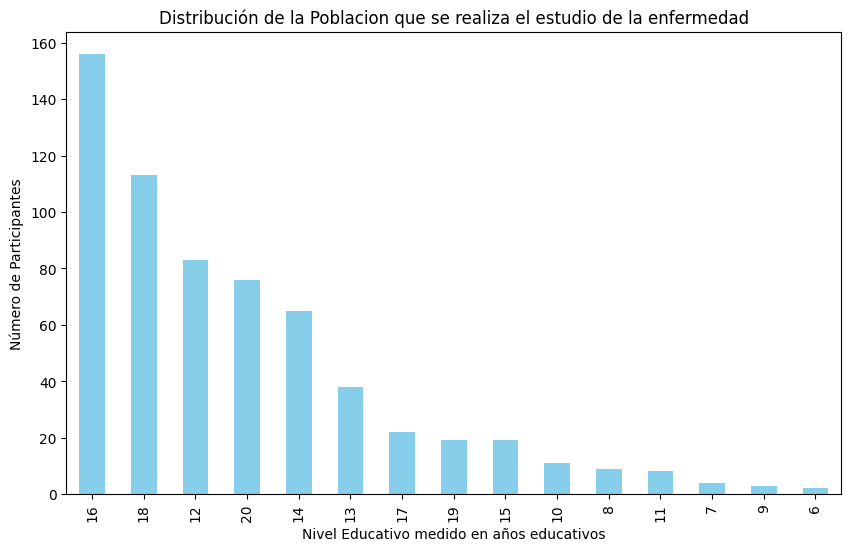

In [40]:
import matplotlib.pyplot as plt
import pandas as pd


df_educacion = df[['PTEDUCAT', 'DX']]

# Contar el número de participantes en cada categoría de nivel educativo
conteo_educacion = df_educacion['PTEDUCAT' ].value_counts()

# Configurar el gráfico de barras
plt.figure(figsize=(10, 6))
conteo_educacion.plot(kind='bar', color='skyblue')

# Agregar etiquetas y título
plt.xlabel('Nivel Educativo medido en años educativos')
plt.ylabel('Número de Participantes')
plt.title('Distribución de la Poblacion que se realiza el estudio de la enfermedad')

# Mostrar el gráfico
plt.show()


***¿Como afecta la enfermedad segun los años de educacion?****

<Figure size 1200x800 with 0 Axes>

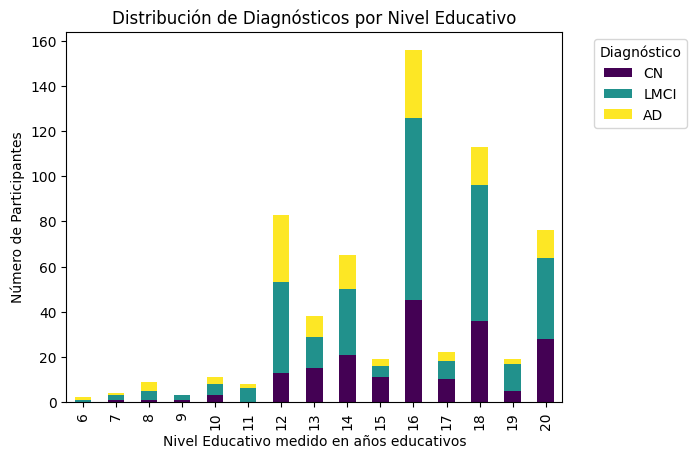

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns  


# Filtrar el DataFrame para obtener solo las columnas relevantes
df_diagnostico_educacion = df[['PTEDUCAT', 'DX']]

# Crear una tabla de contingencia (crosstab) para contar las ocurrencias de diagnósticos por nivel educativo
tabla_contingencia = pd.crosstab(df_diagnostico_educacion['PTEDUCAT'], df_diagnostico_educacion['DX'])

# Ordenar las columnas para mejorar la visualización
orden_columnas = ['CN', 'LMCI', 'AD']
tabla_contingencia = tabla_contingencia[orden_columnas]

# Configurar el gráfico de barras apiladas
plt.figure(figsize=(12, 8))
tabla_contingencia.plot(kind='bar', stacked=True, colormap='viridis')

# Agregar etiquetas y título
plt.xlabel('Nivel Educativo medido en años educativos')
plt.ylabel('Número de Participantes')
plt.title('Distribución de Diagnósticos por Nivel Educativo')

# Mejorar la leyenda
plt.legend(title='Diagnóstico', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()


***¿Actua la enfermedad por los años de estudio que uno tenga?***

Prueba de Shapiro-Wilk para AD: p-value = 0.00011682908370858058
Prueba de Shapiro-Wilk para LMCI: p-value = 4.3379114189612267e-10
Prueba de Shapiro-Wilk para CN: p-value = 1.2767561656801263e-06


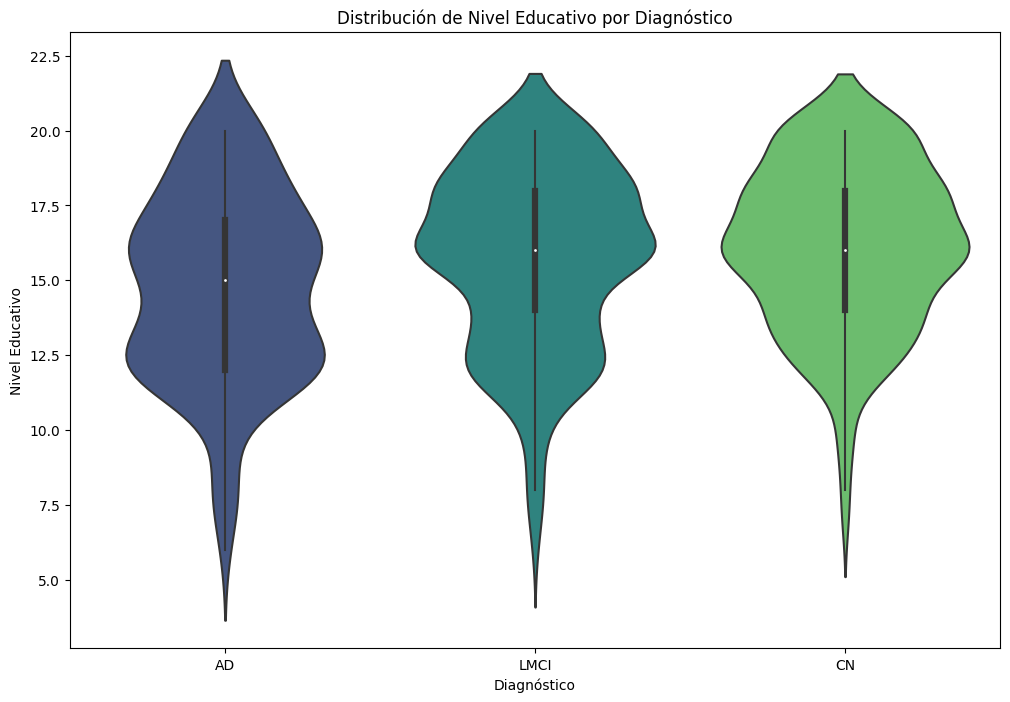

In [42]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt



# Filtrar el DataFrame para obtener solo las columnas relevantes
df_educacion_diagnostico = df[['PTEDUCAT', 'DX']]

# Crear un gráfico de violín para visualizar las distribuciones
plt.figure(figsize=(12, 8))
sns.violinplot(x='DX', y='PTEDUCAT', data=df_educacion_diagnostico, palette='viridis')
plt.title('Distribución de Nivel Educativo por Diagnóstico')
plt.xlabel('Diagnóstico')
plt.ylabel('Nivel Educativo')

# Realizar la prueba de Shapiro-Wilk para cada grupo de diagnóstico
for diagnostico in df_educacion_diagnostico['DX'].unique():
    subset = df_educacion_diagnostico[df_educacion_diagnostico['DX'] == diagnostico]['PTEDUCAT']
    _, p_value = stats.shapiro(subset)
    print(f'Prueba de Shapiro-Wilk para {diagnostico}: p-value = {p_value}')

# Mostrar el gráfico
plt.show()


Impresion: Segun lo visto, parece ser que la enfermedad afecta de manera independiete a los años de estudio del paciente que se realiza el analisis, pero es una enfermedad que sea diagnostica con mas frecuencia en aquellos segmentos donde el paciente pertenece a los niveles años de estudio, tal vez porque este mas informado

Me parece que no son relevantes en la base de datos el tema de si raza ni etnias porque los datos estan muy concentrados 

In [43]:
import pandas as pd

# Asumiendo que tu DataFrame se llama 'df'
# Reemplaza 'df' con el nombre real de tu DataFrame

# Obtener valores únicos de la columna 'PTETHCAT' (etnia)
valores_unicos_etnia = df['PTETHCAT'].unique()

# Obtener valores únicos de la columna 'PTRACCAT' (categorización racial)
valores_unicos_racial = df['PTRACCAT'].unique()

# Imprimir los valores únicos
print("Valores únicos en la columna 'PTETHCAT' (Etnia):")
print(valores_unicos_etnia)

print("\nValores únicos en la columna 'PTRACCAT' (Categorización Racial):")
print(valores_unicos_racial)


Valores únicos en la columna 'PTETHCAT' (Etnia):
['Not Hisp/Latino' 'Hisp/Latino' 'Unknown']

Valores únicos en la columna 'PTRACCAT' (Categorización Racial):
['White' 'Black' 'Asian']


<Figure size 1200x800 with 0 Axes>

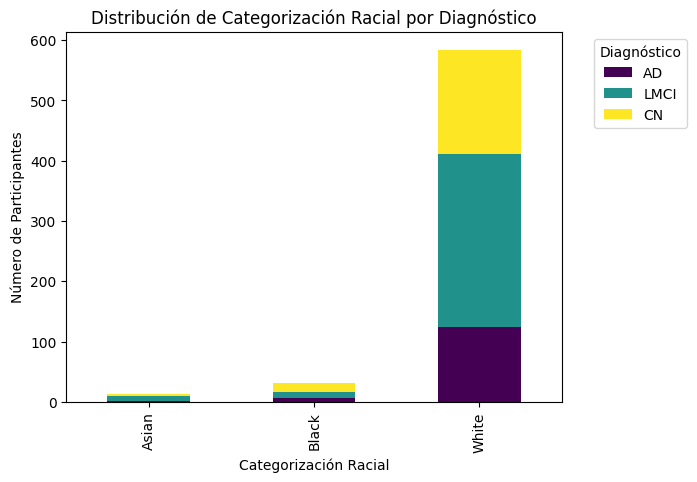

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asumiendo que tu DataFrame se llama 'df'
# Reemplaza 'df' con el nombre real de tu DataFrame

# Filtrar el DataFrame para obtener solo las columnas relevantes
df_raza_diagnostico = df[['PTRACCAT', 'DX']]

# Crear una tabla de contingencia para contar las ocurrencias de categorías raciales por diagnóstico
tabla_contingencia = pd.crosstab(df_raza_diagnostico['PTRACCAT'], df_raza_diagnostico['DX'])

# Ordenar las columnas para mejorar la visualización
orden_columnas = df_raza_diagnostico['DX'].unique()
tabla_contingencia = tabla_contingencia[orden_columnas]

# Configurar el gráfico de barras apiladas
plt.figure(figsize=(12, 8))
tabla_contingencia.plot(kind='bar', stacked=True, colormap='viridis')

# Agregar etiquetas y título
plt.xlabel('Categorización Racial')
plt.ylabel('Número de Participantes')
plt.title('Distribución de Categorización Racial por Diagnóstico')

# Mejorar la leyenda
plt.legend(title='Diagnóstico', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()


¿En los que tienen la enfermedad como es la distribucion de edad, analizado luego a hombres y mujeres por separado?

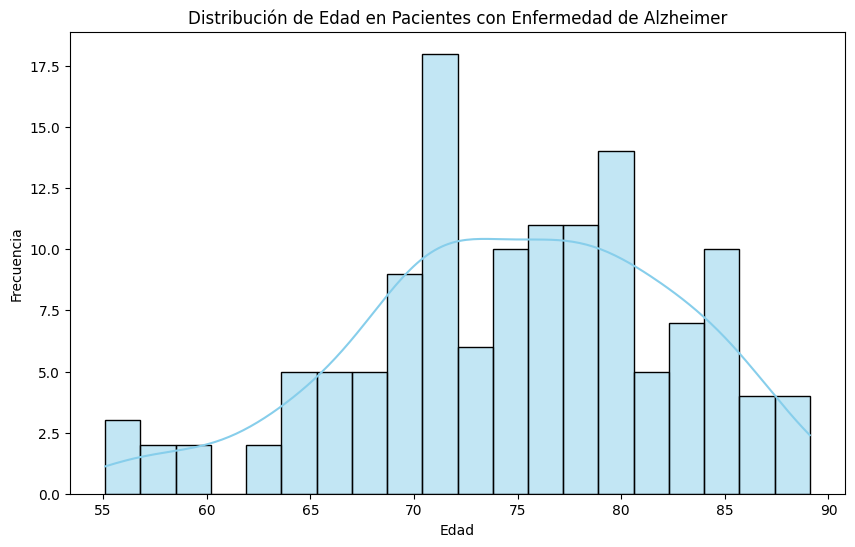

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

df_enfermedad = df[df['DX'] == 'AD']

# Configurar el gráfico de histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_enfermedad['AGE'], bins=20, kde=True, color='skyblue')

# Agregar etiquetas y título
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edad en Pacientes con Enfermedad de Alzheimer')

# Mostrar el gráfico
plt.show()

Ahora solo Mujeres

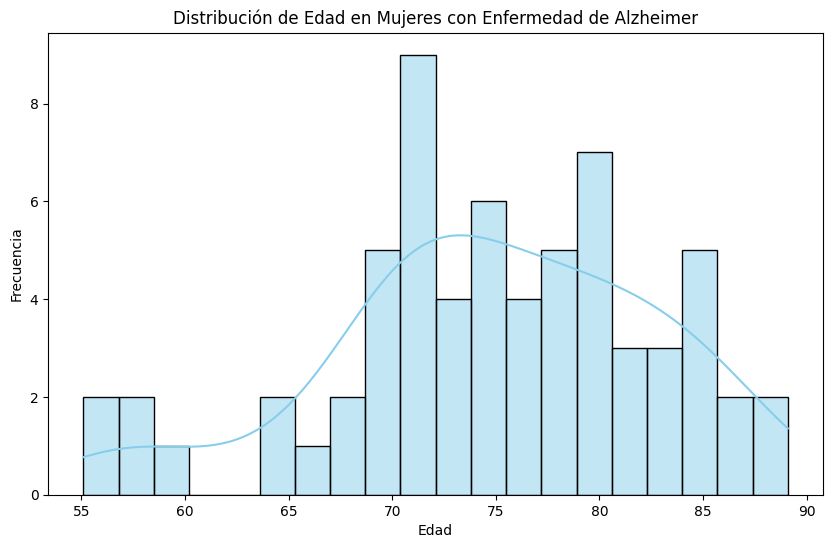

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar el DataFrame para incluir solo mujeres con diagnóstico 'AD'
df_mujeres_enfermedad = df[(df['DX'] == 'AD') & (df['PTGENDER'] == 'Female')]

# Configurar el gráfico de histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_mujeres_enfermedad['AGE'], bins=20, kde=True, color='skyblue')

# Agregar etiquetas y título
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edad en Mujeres con Enfermedad de Alzheimer')

# Mostrar el gráfico
plt.show()


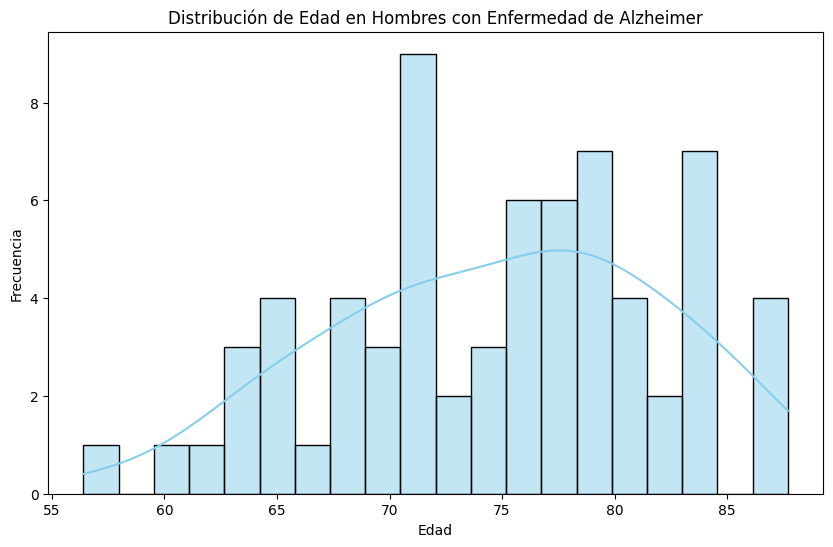

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt


# Filtrar el DataFrame para incluir solo hombres con diagnóstico 'AD'
df_hombres_enfermedad = df[(df['DX'] == 'AD') & (df['PTGENDER'] == 'Male')]

# Configurar el gráfico de histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_hombres_enfermedad['AGE'], bins=20, kde=True, color='skyblue')

# Agregar etiquetas y título
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edad en Hombres con Enfermedad de Alzheimer')

# Mostrar el gráfico
plt.show()


¿ Que porcentaje de la poblacion tiene Alzheimer, haciendo corez cada 5 años?

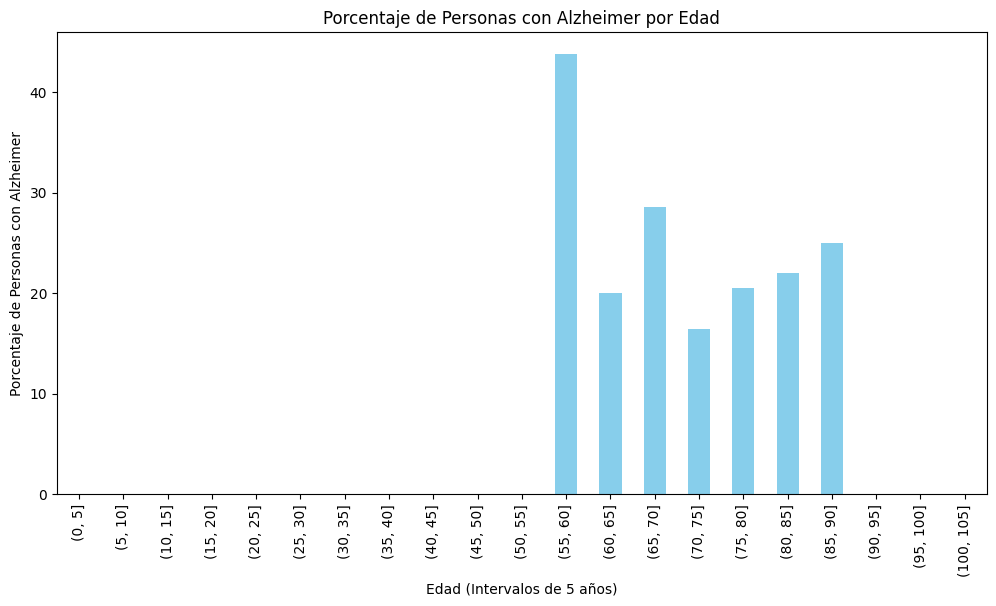

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un nuevo DataFrame con intervalos de 5 años
df_cortes_edad = df.copy()
df_cortes_edad['Edad_Cortada'] = pd.cut(df_cortes_edad['AGE'], bins=range(0, 110, 5))

# Contar el número de personas con Alzheimer en cada intervalo
conteo_alzheimer_por_edad = df_cortes_edad[df_cortes_edad['DX'] == 'AD'].groupby('Edad_Cortada').size()

# Contar el número total de personas en cada intervalo
conteo_total_por_edad = df_cortes_edad.groupby('Edad_Cortada').size()

# Calcular el porcentaje de personas con Alzheimer en cada intervalo
porcentaje_alzheimer_por_edad = (conteo_alzheimer_por_edad / conteo_total_por_edad) * 100

# Configurar el gráfico de barras
plt.figure(figsize=(12, 6))
porcentaje_alzheimer_por_edad.plot(kind='bar', color='skyblue')
plt.xlabel('Edad (Intervalos de 5 años)')
plt.ylabel('Porcentaje de Personas con Alzheimer')
plt.title('Porcentaje de Personas con Alzheimer por Edad')

# Mostrar el gráfico
plt.show()


Conlusion II: Pareciera que a partir de los 65 la enfermedad empieza a diagnosticarse con mayor frecuencia

La base de dagtos tiene una GEN llamado APOE 4, Vamos a Intentar a Interpretar si esto tiene alguna relacion con la enfermedad

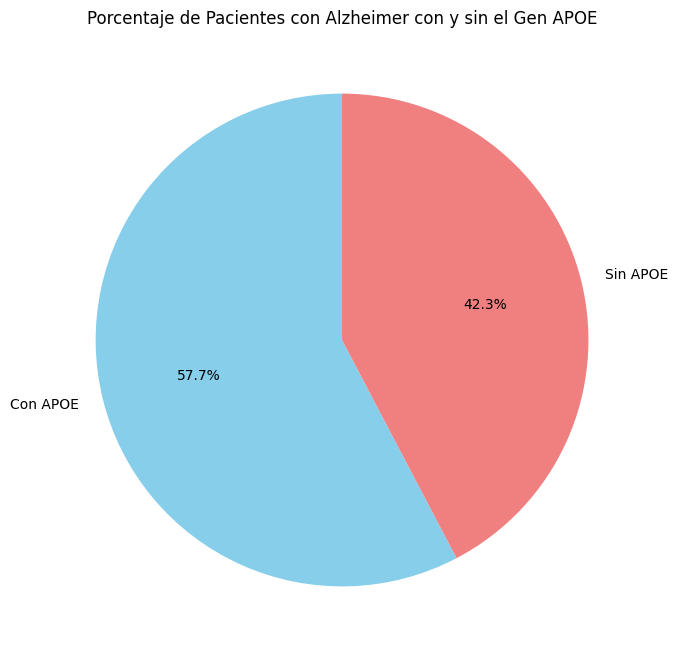

In [49]:
import matplotlib.pyplot as plt

# Filtrar el DataFrame para incluir solo aquellos con diagnóstico 'AD'
df_alzheimer = df[df['DX'] == 'AD']

# Contar el número de pacientes con el gen APOE en el subconjunto de Alzheimer
conteo_apoe_alzheimer = df_alzheimer[df_alzheimer['APOE4'] == 1].shape[0]

# Contar el número de pacientes sin el gen APOE en el subconjunto de Alzheimer
conteo_no_apoe_alzheimer = df_alzheimer[df_alzheimer['APOE4'] == 0].shape[0]

# Crear una lista con los conteos
conteos = [conteo_apoe_alzheimer, conteo_no_apoe_alzheimer]

# Etiquetas para la leyenda
etiquetas = ['Con APOE', 'Sin APOE']

# Configurar el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(conteos, labels=etiquetas, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
plt.title('Porcentaje de Pacientes con Alzheimer con y sin el Gen APOE')

# Mostrar el gráfico
plt.show()


¿Cuantos de los Pacientes que no tienen la enfermedad tienen el gen APOE?

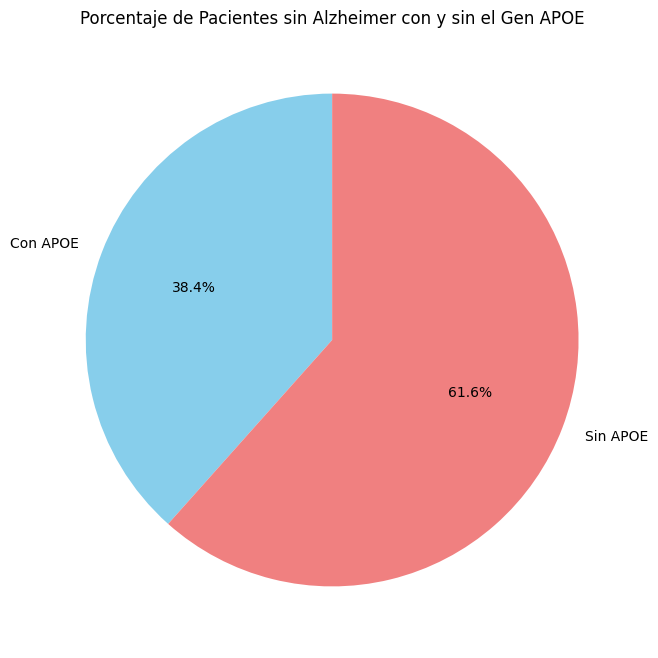

In [50]:
import matplotlib.pyplot as plt


# Filtrar el DataFrame para incluir solo aquellos sin diagnóstico 'AD'
df_no_alzheimer = df[df['DX'] != 'AD']

# Contar el número de pacientes sin Alzheimer que tienen el gen APOE
conteo_apoe_no_alzheimer = df_no_alzheimer[df_no_alzheimer['APOE4'] == 1].shape[0]

# Contar el número de pacientes sin Alzheimer que no tienen el gen APOE
conteo_no_apoe_no_alzheimer = df_no_alzheimer[df_no_alzheimer['APOE4'] == 0].shape[0]

# Crear una lista con los conteos
conteos_no_alzheimer = [conteo_apoe_no_alzheimer, conteo_no_apoe_no_alzheimer]

# Etiquetas para la leyenda
etiquetas_no_alzheimer = ['Con APOE', 'Sin APOE']

# Configurar el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(conteos_no_alzheimer, labels=etiquetas_no_alzheimer, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
plt.title('Porcentaje de Pacientes sin Alzheimer con y sin el Gen APOE')

# Mostrar el gráfico
plt.show()


Pacientes Cognitivamente sanos sin el gen

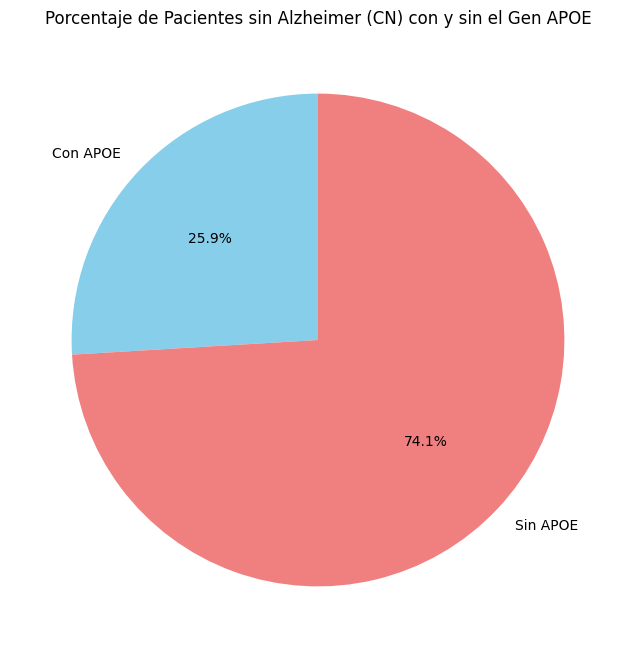

In [51]:
import matplotlib.pyplot as plt

# Asumiendo que tu DataFrame se llama 'df'
# Reemplaza 'df' con el nombre real de tu DataFrame

# Filtrar el DataFrame para incluir solo aquellos sin Alzheimer y con diagnóstico 'CN'
df_sin_alzheimer_cn = df[(df['DX'] == 'CN')]

# Contar el número de pacientes sin Alzheimer (CN) que tienen el gen APOE
conteo_apoe_sin_alzheimer_cn = df_sin_alzheimer_cn[df_sin_alzheimer_cn['APOE4'] == 1].shape[0]

# Contar el número de pacientes sin Alzheimer (CN) que no tienen el gen APOE
conteo_no_apoe_sin_alzheimer_cn = df_sin_alzheimer_cn[df_sin_alzheimer_cn['APOE4'] == 0].shape[0]

# Crear una lista con los conteos
conteos_sin_alzheimer_cn = [conteo_apoe_sin_alzheimer_cn, conteo_no_apoe_sin_alzheimer_cn]

# Etiquetas para la leyenda
etiquetas_sin_alzheimer_cn = ['Con APOE', 'Sin APOE']

# Configurar el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(conteos_sin_alzheimer_cn, labels=etiquetas_sin_alzheimer_cn, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
plt.title('Porcentaje de Pacientes sin Alzheimer (CN) con y sin el Gen APOE')

# Mostrar el gráfico
plt.show()


Concusion III: Pareciera que existe una relacion entre la enfermedad del alzheimer con el GEN APOE4, que si se le agrega aquellos pacientes que tienen deterioros cognitivo leve, abarcaria el 75% de los pacientes que se van a analizar tiene un deterioro y tienen el gen

¿Existe alguna diferencia en las puntuaciones del Mini Examen del Estado Mental (MMSE) entre hombres y mujeres en el conjunto de datos?

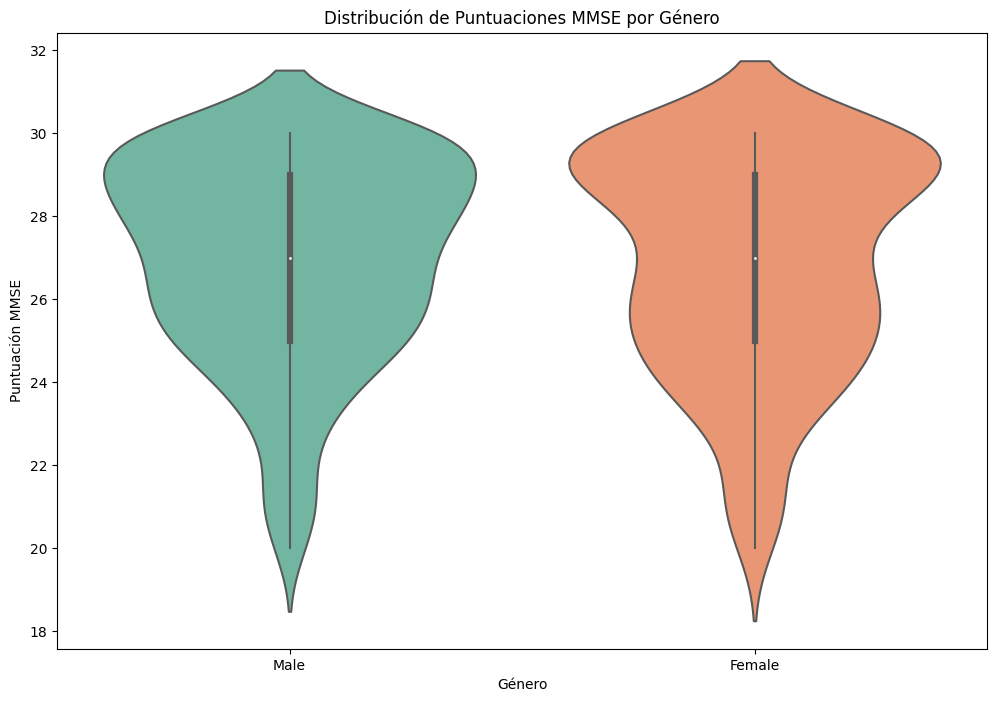

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt


# Configurar el gráfico de violín
plt.figure(figsize=(12, 8))
sns.violinplot(x='PTGENDER', y='MMSE', data=df, palette='Set2')

# Agregar etiquetas y título
plt.xlabel('Género')
plt.ylabel('Puntuación MMSE')
plt.title('Distribución de Puntuaciones MMSE por Género')

# Mostrar el gráfico
plt.show()


El MMSE (Mini Examen del Estado Mental) es una prueba breve utilizada para evaluar la función cognitiva y detectar posibles trastornos cognitivos, como el deterioro cognitivo leve y la demencia. Fue desarrollado por Folstein, Folstein y McHugh en 1975 y ha sido ampliamente utilizado en entornos clínicos y de investigacióN